# Comment topic classification with Universal Sentence Encoder

https://tfhub.dev/google/universal-sentence-encoder/2

### Import libraries

In [8]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

### Load the Universal Sentence Encoder model

In [9]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" #@param ["https://tfhub.dev/google/universal-sentence-encoder/2", "https://tfhub.dev/google/universal-sentence-encoder-large/3"]
embed = hub.Module(module_url)

### Read in comment file

In [42]:
sample_comments = pd.read_csv("SampleComments.csv", na_values=[])
comment_list = sample_comments['NPSReason'].values.tolist()

### Generate embeddings for each comment

In [37]:
with tf.Session() as session:
  session.run([tf.global_variables_initializer(), tf.tables_initializer()])
  message_embeddings = session.run(embed(comment_list))

sample_comments = pd.concat([sample_comments['NPSReason'], pd.DataFrame(message_embeddings)], axis=1)

### Calculate similarity with randomly chosen comment based on embeddings

In [109]:
sample_comments['NPSReason'][163]

'Excellent hotel location  but our garden room was at street level and had a rectangular glass panel adjacent to the door which was a mix of clear and opaque glass. This meant that passers by could see in to the beds - especially if the room was lit. We h'

In [110]:
reference = 163

cosine_sim = []

for c in range(sample_comments.shape[0]):
    cosine_sim.append(cosine_similarity(sample_comments.iloc[reference, 1:513].values.reshape(1, -1)
                                        , sample_comments.iloc[c, 1:513].values.reshape(1, -1))[0][0])

sample_comments['similarity'] = cosine_sim

In [113]:
sample_comments.sort_values('similarity', ascending = False)['NPSReason'].to_csv('Ranked comments.csv')

C:\Users\User\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


2. Do clustering!!!
3. assign a tag to a comment
4. calculate embedding for tag
5. compare results
6. assign tags based on similarities to other comments
7. emulate the app behavior

In [115]:
from sklearn.cluster import KMeans

In [123]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(sample_comments.iloc[:, 1:513])

In [126]:
kmeans.labels_

sample_comments['clusters'] = kmeans.labels_

sample_comments.to_csv('Clusters.csv')

In [121]:
X = np.array([[1, 2], [0.5, 4], [1, 0],
               [10, 2], [-0.4, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, 1, 0, 1])

In [127]:
from sklearn.cluster import SpectralClustering

In [128]:
spectral = SpectralClustering(n_clusters=5, assign_labels="discretize", random_state=0).fit(sample_comments.iloc[:, 1:513])

In [129]:
sample_comments['spectral'] = spectral.labels_

sample_comments.to_csv('Clusters.csv')

In [ ]:
>>> from sklearn.cluster import SpectralClustering
>>> import numpy as np
>>> X = np.array([[1, 1], [2, 1], [1, 0],
...               [4, 7], [3, 5], [3, 6]])
>>> clustering = SpectralClustering(n_clusters=2,
...         assign_labels="discretize",
...         random_state=0).fit(X)
>>> clustering.labels_
array([1, 1, 1, 0, 0, 0])
>>> clustering 
SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
          n_neighbors=10, random_state=0)

https://github.com/Tony607/Keras_Deep_Clustering

https://scikit-learn.org/stable/modules/clustering.html

In [144]:
from sklearn.manifold import TSNE
X = sample_comments.iloc[:, 1:513]
X_embedded = TSNE(n_components=2, metric='cosine').fit_transform(X)
X_embedded.shape

(991, 2)

In [131]:
X_embedded

array([[ -6.072315  ,  -0.79736876],
       [ 12.554338  ,  10.393167  ],
       [ -7.327249  ,  -2.4234147 ],
       ...,
       [ 26.26698   , -19.581446  ],
       [  6.1878843 ,  -6.7985177 ],
       [-20.79653   ,  20.224169  ]], dtype=float32)

In [132]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# We import seaborn to make nice plots.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


https://lvdmaaten.github.io/tsne/

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [141]:
df = pd.DataFrame(X_embedded)

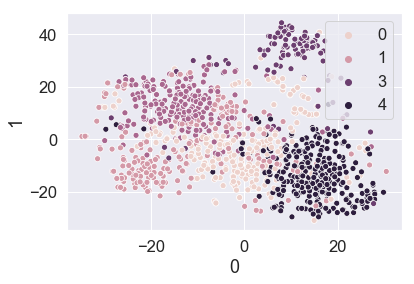

In [145]:
sns.scatterplot(x=0, y=1, data=df, hue=spectral.labels_)